In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\balu T\Downloads\Amazon Sale Report.csv")
df.sample(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
97628,97627,403-7222197-0641942,06-23-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XXL,Shipped,...,INR,1137.00,Kolkata,WEST BENGAL,700054.0,IN,False,NaN,NaN,NaN
68434,68433,403-3746940-8043524,05-16-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,XL,On the Way,...,INR,570.48,SRINAGAR,JAMMU & KASHMIR,190015.0,IN,False,Easy Ship,NaN,NaN
97448,97447,171-6065250-3667505,06-23-22,Shipped - Picked Up,Merchant,Amazon.in,Standard,Blazzer,XXL,Shipped,...,INR,735.00,CHENNAI,TAMIL NADU,600089.0,IN,False,Easy Ship,NaN,NaN
18468,18467,404-6907635-3593116,04-19-22,Cancelled,Merchant,Amazon.in,Standard,Shirt,XL,On the Way,...,INR,303.81,TINDIVANAM,TAMIL NADU,604001.0,IN,False,Easy Ship,NaN,NaN
56361,56360,408-3377274-6431542,05-26-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,0.00,HYDERABAD,TELANGANA,500019.0,IN,False,NaN,NaN,NaN
24991,24990,407-7555096-1097157,04-15-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,...,INR,406.00,NEW DELHI,DELHI,110091.0,IN,False,NaN,NaN,NaN
96898,96897,407-8642510-3525913,06-24-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,L,Shipped,...,INR,399.00,HYDERABAD,TELANGANA,500084.0,IN,False,NaN,NaN,NaN
82764,82763,406-7614800-6848319,05-05-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,533.00,PIMPRI CHINCHWAD,MAHARASHTRA,411044.0,IN,False,NaN,NaN,NaN
25343,25342,405-9481212-3204361,04-15-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XXL,Shipped,...,INR,1099.00,CHINGOLI,KERALA,690532.0,IN,False,NaN,NaN,NaN
98467,98466,407-7063400-6408302,06-23-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,3XL,Shipped,...,INR,735.00,PUNE,MAHARASHTRA,411028.0,IN,False,Easy Ship,NaN,NaN


In [7]:
df.info()
#removing last 2 columns because they contains full null values
#convert date column into date format
#remove currency column because ship country is india so obviously the currency will be in indian rupees
#remove rows where amount is null
#remove 0th column i.e index
#renaming the column Status to delivery status
#Finding Outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [5]:
df.rename(columns={"Status":"Delivery Status"},inplace = True)


In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df["ship-state"]= df["ship-state"].replace({"rajsthan":"Rajsthan","Puducherry":"Pondicherry","PB":"Punjab","orissa":"Odissa","Delhi":"DELHI","New Delhi":"DELHI","Rajasthan":"RAJASTHAN","RJ":"RAJASTHAN","rajasthan":"RAJASTHAN","Punjab":"PUNJAB","punjab":"PUNJAB ",
                                             "Odisha":"ODISHA","Odissa":"ODISHA","Orissa":"ODISHA","Arunachal Pradesh":"ARUNACHAL PRADESH","Goa":"GOA",
                                             "Bihar":"BIHAR","Mizoram":"MIZORAM","Sikkim":"SIKKIM","Manipur":"MANIPUR","bihar":"BIHAR","Arunachal pradesh":"ARUNACHAL PRADESH","Meghalaya":"MEGHALAYA","delhi":"DELHI",
                                            "Chandigarh":"CHANDIGARH","Punjab/Mohali/Zirakpur":"PUNJAB" })

In [11]:
df['ship-state'] = df['ship-state'].replace({
    'Rajshthan': 'Rajasthan',
    'Rajsthan': 'Rajasthan',
    'Odissa': 'Odisha',
    'Pondicherry': 'Puducherry',
    'Nl': 'Nagaland',
    'Ar': 'Arunachal Pradesh'
})

In [13]:
df["ship-state"] = df['ship-state'].str.title()

In [15]:
a = df[["New","PendingS","index","currency"]]
df.drop(columns = a,axis = 1,inplace = True)

In [17]:
df = df.drop_duplicates()
df.shape

(128017, 17)

In [19]:
print(df["ship-country"].value_counts())
df.drop(columns = "ship-country",inplace =True,axis = 1)

ship-country
IN    127985
Name: count, dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128017 entries, 0 to 128975
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128017 non-null  object        
 1   Date                128017 non-null  datetime64[ns]
 2   Delivery Status     128017 non-null  object        
 3   Fulfilment          128017 non-null  object        
 4   Sales Channel       128017 non-null  object        
 5   ship-service-level  128017 non-null  object        
 6   Category            128017 non-null  object        
 7   Size                128017 non-null  object        
 8   Courier Status      128017 non-null  object        
 9   Qty                 128017 non-null  int64         
 10  Amount              120454 non-null  float64       
 11  ship-city           127985 non-null  object        
 12  ship-state          127985 non-null  object        
 13  ship-postal-code    127985 non-nul

## Sales Analysis

#### Calculate total sales for each month

In [107]:
# Group the data by the month (using month names) and calculate total sales for each month
sales_over_time = df.groupby(df['Date'].dt.strftime('%B'))['Amount'].sum()

# Display the sales data
sales_over_time


Date
April    28627458.79
June     23344842.90
March      101683.85
May      26105818.34
Name: Amount, dtype: float64

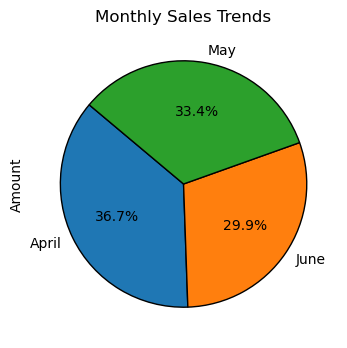

In [149]:
import matplotlib.pyplot as plt

# Group the data by month names and calculate total sales for each month
sales_over_time = df.groupby(df['Date'].dt.strftime('%B'))['Amount'].sum()

# Remove the 'March' data as it's insufficient
sales_over_time = sales_over_time[sales_over_time.index != 'March']

# Create a pie chart to visualize the monthly sales trends
plt.figure(figsize=(4, 4))  # Set the size of the figure
sales_over_time.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=sales_over_time.index, 
                     wedgeprops={'edgecolor': 'black'})  # Set edge color using wedgeprops

# Set title for the pie chart
plt.title('Monthly Sales Trends')

# Display the pie chart
plt.show()



#### Calculate Total Revenue by State and Display Top 10 States by Revenue

ship-state
Maharashtra       13261933.90
Karnataka         10421496.02
Telangana          6880035.27
Uttar Pradesh      6798644.08
Tamil Nadu         6477109.53
Delhi              4374246.41
Kerala             3798362.96
West Bengal        3487951.01
Andhra Pradesh     3198443.86
Haryana            2874244.99
Name: Amount, dtype: float64


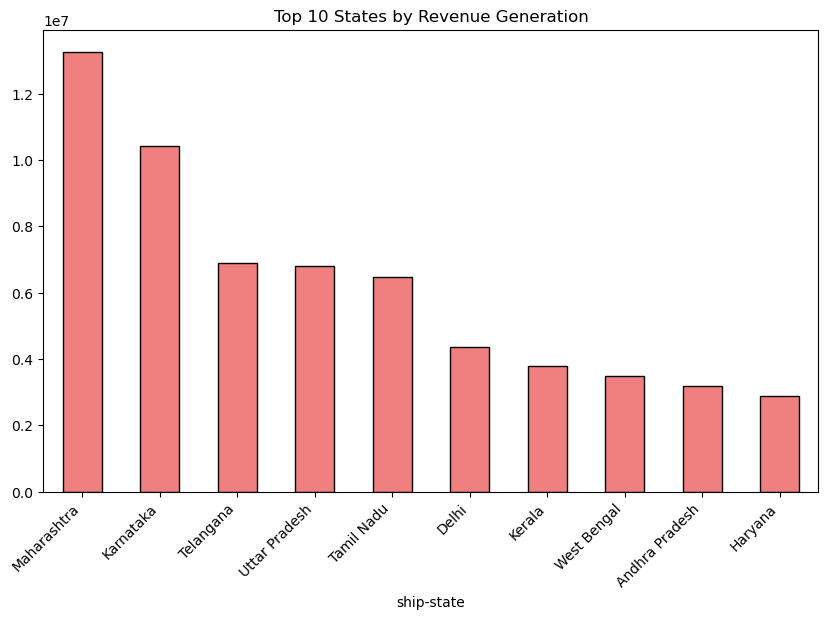

In [125]:
# Group the data by 'ship-state' and calculate the total revenue for each state
top_states_revenue = df.groupby('ship-state')['Amount'].sum()

# Sort the states by revenue in descending order and get the top 10
top_10_states_revenue = top_states_revenue.sort_values(ascending=False).head(10)

# Display the top 10 states and their revenue
print(top_10_states_revenue)

# Optionally, you can visualize the results in a bar plot
top_10_states_revenue.plot(kind='bar', figsize=(10, 6), title='Top 10 States by Revenue Generation', color='lightcoral', edgecolor='black')

# Add values on top of each bar
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

# Display the bar plot
plt.show()


#### Top 10 States by Number of Orders (Shipped vs Cancelled)

Modified Delivery Status  Cancelled  Shipped
ship-state                                  
Maharashtra                    3085    19018
Karnataka                      2337    14851
Tamil Nadu                     1635     9742
Telangana                      1686     9557
Uttar Pradesh                  1668     8931
Delhi                           951     6048
Kerala                         1189     5322
West Bengal                     913     5002
Andhra Pradesh                  911     4462
Gujarat                         621     3829


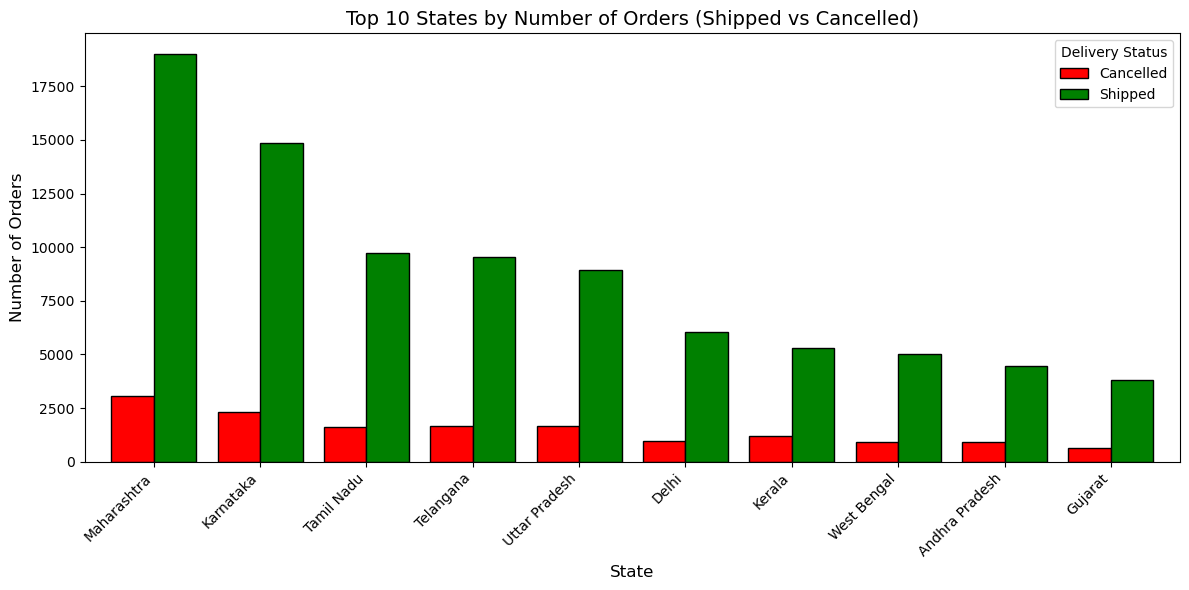

In [218]:
import matplotlib.pyplot as plt

# Map delivery statuses to 'Shipped' and 'Cancelled', and merge other statuses into 'Cancelled'
status_mapping = {
    'Cancelled': 'Cancelled',
    'Shipped': 'Shipped',  # Group 'Shipped' statuses into one
    'Shipped - Delivered to Buyer': 'Shipped',
    'Shipped - Lost in Transit': 'Shipped',
    'Shipped - Out for Delivery': 'Shipped',
    'Shipped - Picked Up': 'Shipped',
    'Shipped - Rejected by Buyer': 'Shipped',
    'Shipped - Returned to Seller': 'Shipped',
    'Shipped - Returning to Seller': 'Shipped',
    'Pending': 'Cancelled',
    'Pending - Waiting for Pick Up': 'Cancelled',
    'Shipping': 'Cancelled',  # Assuming "Shipping" should also be grouped under "Cancelled"
    'Shipped - Damaged': 'Shipped',  # Assuming "Shipped - Damaged" is a part of the "Shipped" category
}

# Apply the mapping to the 'Delivery Status' column
df['Modified Delivery Status'] = df['Delivery Status'].map(status_mapping)

# Group the data by 'ship-state' and 'Modified Delivery Status', and count the number of orders
orders_state_status = df.groupby(['ship-state', 'Modified Delivery Status']).size().unstack(fill_value=0)

# Get the top 10 states based on the total number of orders
top_10_states = orders_state_status.sum(axis=1).nlargest(10).index

# Filter the data to only include the top 10 states
top_10_orders_state_status = orders_state_status.loc[top_10_states]
print(top_10_orders_state_status)

# Plotting a clustered column chart for the top 10 states
ax = top_10_orders_state_status.plot(kind='bar', figsize=(12, 6), width=0.8, color=['red', 'green'], edgecolor='black')

# Set chart title and labels
ax.set_title('Top 10 States by Number of Orders (Shipped vs Cancelled)', fontsize=14)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the legend
plt.legend(title='Delivery Status', labels=['Cancelled', 'Shipped'])

# Show the plot
plt.tight_layout()
plt.show()


## Product Analysis

#### Sales by Category: Total Quantity Sold for Each Category

Category
T-shirt     45129
Shirt       44671
Blazzer     13850
Trousers     9867
Perfume      1048
Wallet        851
Socks         390
Shoes         145
Watch           2
Name: Qty, dtype: int64


<Axes: title={'center': 'Sales by Category'}, xlabel='Category'>

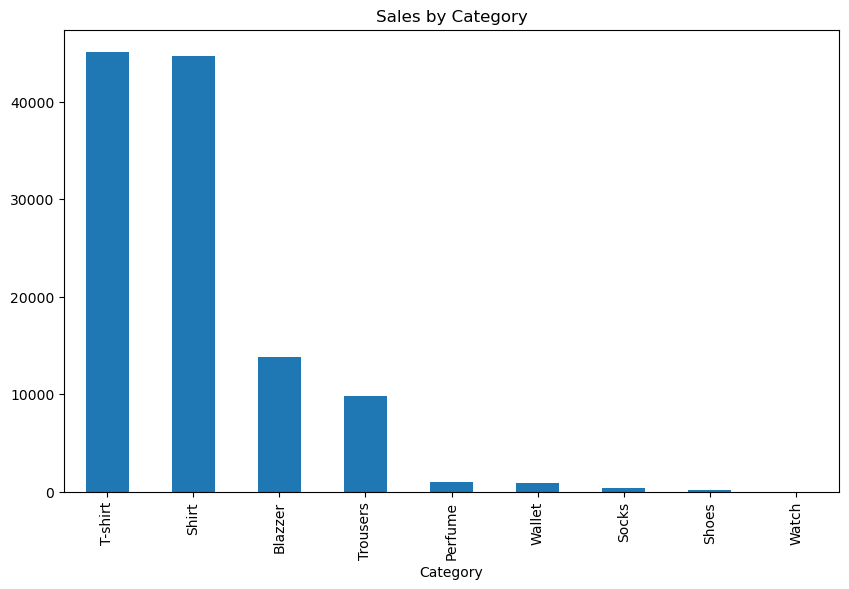

In [164]:
# Group the data by 'Category' and calculate the total sales ('Amount') for each category
category_sales = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)

# Display the total sales for each category, sorted in descending order
print(category_sales)

# Create a bar plot to visualize total sales for each category
category_sales.plot(kind='bar', figsize=(10, 6), title='Sales by Category')


#### Size Distribution: Count of Products by Size

Size
M       22223
L       21643
XL      20392
XXL     17666
S       16680
3XL     14518
XS      10973
Free     2226
6XL       728
5XL       548
4XL       420
Name: count, dtype: int64


<Axes: title={'center': 'Size Distribution'}, ylabel='Size'>

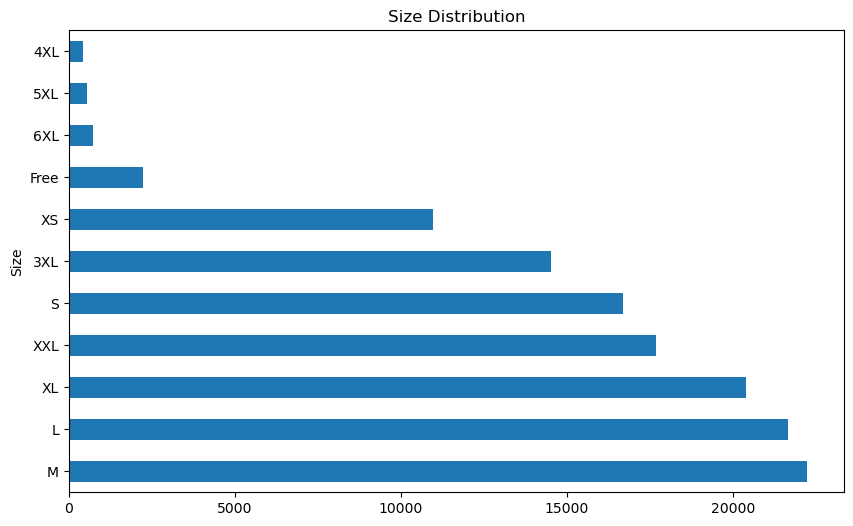

In [167]:
# Calculate the count of products for each size in the 'Size' column
size_distribution = df['Size'].value_counts()

# Display the distribution of products by size
print(size_distribution)

# Create a horizontal bar plot to visualize the size distribution
size_distribution.plot(kind='barh', figsize=(10, 6), title='Size Distribution')


#### Pivot Table: Quantity of Products Sold by State and Category

In [170]:
# Create a pivot table to show the total quantity ('Qty') of products sold by state and category
pivot_table = df.pivot_table(
    index="ship-state",   # Rows: ship-state (states where products are shipped)
    columns="Category",    # Columns: product categories
    values="Qty",          # Values: total quantity of products sold
    aggfunc="sum",         # Aggregation function: sum the quantities
    fill_value=0           # Replace NaN values with 0 (in case there are missing values)
)

# Add a 'Total' column that sums the quantities for each state across all categories
pivot_table["Total"] = pivot_table.sum(axis=1)

# Sort the pivot table by the 'Total' column in descending order
pivot_table = pivot_table.sort_values(by="Total", ascending=False)

# Display the top 15 rows of the sorted pivot table
pivot_table.head(15)


Category,Blazzer,Perfume,Shirt,Shoes,Socks,T-shirt,Trousers,Wallet,Watch,Total
ship-state,,,,,,,,,,
Maharashtra,2536,223,7578,18,57,7424,2271,108,0,20215
Karnataka,2032,155,6154,22,49,5878,1320,182,1,15793
Tamil Nadu,1164,83,5223,26,47,3092,632,73,0,10340
Telangana,1561,121,4318,6,35,3477,599,76,1,10194
Uttar Pradesh,900,77,3087,14,28,4554,729,80,0,9469
Delhi,582,62,2013,10,14,2859,782,42,0,6364
Kerala,1099,25,2613,5,19,1702,277,23,0,5763
West Bengal,548,47,2257,10,26,1854,506,34,0,5282
Andhra Pradesh,625,36,2275,2,13,1630,169,31,0,4781


## Fullfillment  Analysis

Fulfillment analysis evaluates and optimizes the process of completing customer orders, focusing on speed, accuracy, and cost-efficiency to improve customer satisfaction and operations. Key metrics include processing time, delivery rate, and order accuracy.

#### Fulfillment Status Distribution: Pie chart of fulfilled vs not fulfilled orders
Merchant: Refers to third-party sellers on Amazon who manage their own inventory, pricing, and shipping, unless using Fulfillment by Amazon (FBA).
Amazon: Refers to products sold directly by Amazon, where the company controls inventory, pricing, and fulfillment.





Fulfilment
Amazon      83665
Merchant    32288
Name: Qty, dtype: int64


<Axes: ylabel='Qty'>

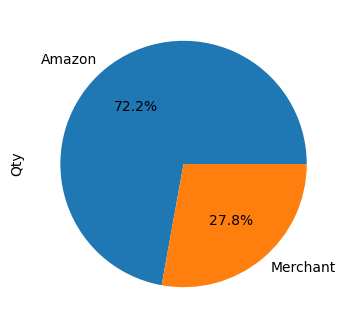

In [184]:
fulfillment_analysis = df.groupby('Fulfilment')['Qty'].sum()
print(fulfillment_analysis)
fulfillment_analysis.plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4))

Fulfilment                Amazon  Merchant
Modified Delivery Status                  
Cancelled                  11678      7307
Shipped                    77407     31625


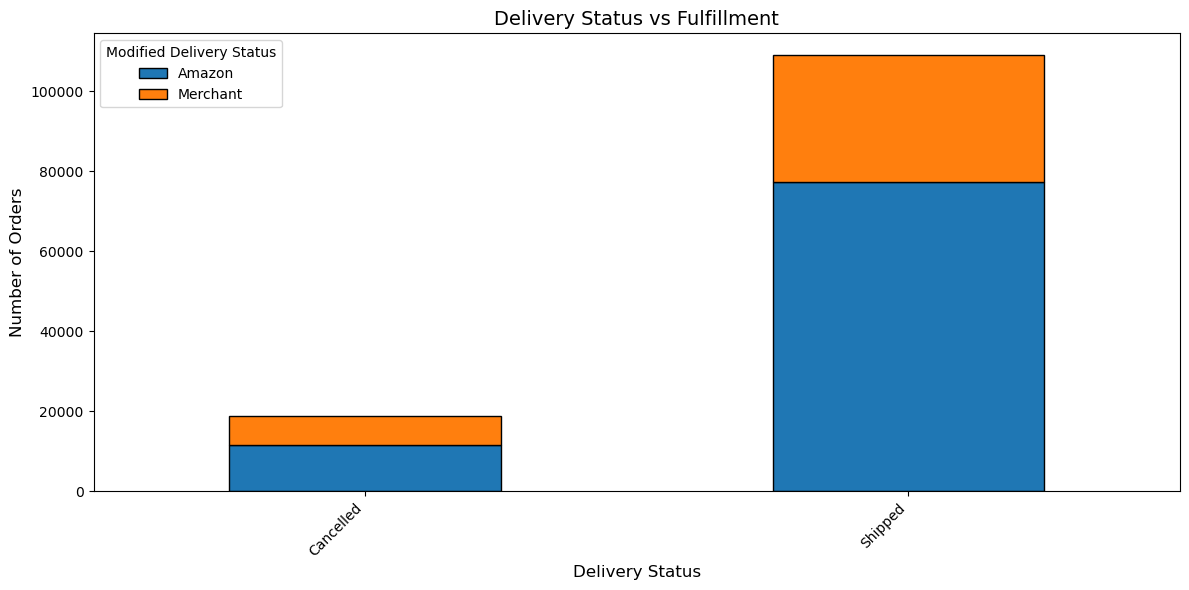

In [232]:
# Group the data by 'Modified Delivery Status' and 'Fulfillment' and count the number of orders
delivery_fulfillment_status = df.groupby(['Modified Delivery Status', 'Fulfilment']).size().unstack(fill_value=0)
print(delivery_fulfillment_status )
# Plotting a stacked bar chart to visualize delivery status by fulfillment
ax = delivery_fulfillment_status.plot(kind='bar', stacked=True, figsize=(12, 6), edgecolor='black')

# Set chart title and labels
ax.set_title('Delivery Status vs Fulfillment', fontsize=14)
ax.set_xlabel('Delivery Status', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the legend
plt.legend(title='Modified Delivery Status')

# Show the plot
plt.tight_layout()
plt.show()


## Customer Segmentation

## Geographical Analysis

In [242]:
import pandas as pd

# Group the data by 'ship-state' and 'ship-city', then calculate the total sales ('Amount') for each combination
state_city_sales = df.groupby(['ship-state', 'ship-city'])['Amount'].sum().reset_index()

# Calculate the total sales per state
state_sales = state_city_sales.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

# Get the top 5 states based on total sales
top_5_states = state_sales.head(5).index

# Initialize an empty dictionary to store top 10 cities for each of the top 5 states
top_cities_per_state = {}

# For each of the top 5 states, find the top 10 cities based on sales
for state in top_5_states:
    # Filter the data for the current state
    state_data = state_city_sales[state_city_sales['ship-state'] == state]
    
    # Sort cities by sales within the state and select the top 10 cities
    top_cities = state_data.sort_values(by='Amount', ascending=False).head(5)
    
    # Store the top cities and their sales in the dictionary
    top_cities_per_state[state] = top_cities[['ship-city', 'Amount']].values.tolist()

# Display the top 5 states and their respective top 10 cities
for state, cities in top_cities_per_state.items():
    print(f"State: {state}")
    for city, sales in cities:
        print(f"  - City: {city}, Sales: {sales}")


State: Maharashtra
  - City: MUMBAI, Sales: 3677250.37
  - City: PUNE, Sales: 2330318.18
  - City: THANE, Sales: 999615.48
  - City: NAVI MUMBAI, Sales: 751227.81
  - City: Mumbai, Sales: 515149.89
State: Karnataka
  - City: BENGALURU, Sales: 6806039.31
  - City: Bangalore, Sales: 439329.62
  - City: Bengaluru, Sales: 398579.81
  - City: BANGALORE, Sales: 338841.71
  - City: MYSURU, Sales: 239141.79
State: Telangana
  - City: HYDERABAD, Sales: 4917960.25
  - City: Hyderabad, Sales: 552301.14
  - City: SECUNDERABAD, Sales: 275314.2
  - City: WARANGAL, Sales: 105019.57
  - City: Secunderabad, Sales: 88465.75
State: Uttar Pradesh
  - City: LUCKNOW, Sales: 930123.34
  - City: NOIDA, Sales: 907435.98
  - City: GHAZIABAD, Sales: 834613.35
  - City: GREATER NOIDA, Sales: 337269.72
  - City: KANPUR, Sales: 325458.36
State: Tamil Nadu
  - City: CHENNAI, Sales: 3085104.93
  - City: Chennai, Sales: 430619.67
  - City: COIMBATORE, Sales: 420283.25
  - City: MADURAI, Sales: 127250.87
  - City: TIRU

## Business Insights

In [35]:
delivery_issues = df['Courier Status'].value_counts()
delivery_issues

Courier Status
Shipped       108830
On the Way      6799
Unshipped       6644
Cancelled       5744
Name: count, dtype: int64

In [43]:
b2b_sales = df[df['B2B'] == True]['Amount'].sum()
non_b2b_sales = df[df['B2B'] == False]['Amount'].sum()
print(b2b_sales)
print(non_b2b_sales)

588972.79
77590831.09


In [47]:
service_level_analysis = df.groupby('ship-service-level')['Amount'].sum()
service_level_analysis

ship-service-level
Expedited    54045826.00
Standard     24133977.88
Name: Amount, dtype: float64

In [97]:
df

,Order ID,Date,Delivery Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,Maharashtra,400081.0,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,Karnataka,560085.0,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,Maharashtra,410210.0,True,NaN
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,Puducherry,605008.0,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,Tamil Nadu,600073.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,517.00,HYDERABAD,Telangana,500013.0,False,NaN
128972,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,999.00,GURUGRAM,Haryana,122004.0,False,NaN
128973,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,690.00,HYDERABAD,Telangana,500049.0,False,NaN
128974,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,1199.00,Halol,Gujarat,389350.0,False,NaN


In [99]:
df.shape

(128017, 16)